In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (20, 4)

In [2]:
X, Y = np.mgrid[0:1:5j, 0:1:5j]
x, y = X.ravel(), Y.ravel()

# Translation
---
$$
\large x'=x + t_x \\
\large y'=y + t_y
$$
using homogeneous matrix
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 & t_x \\ 0 & 1 & t_y  \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

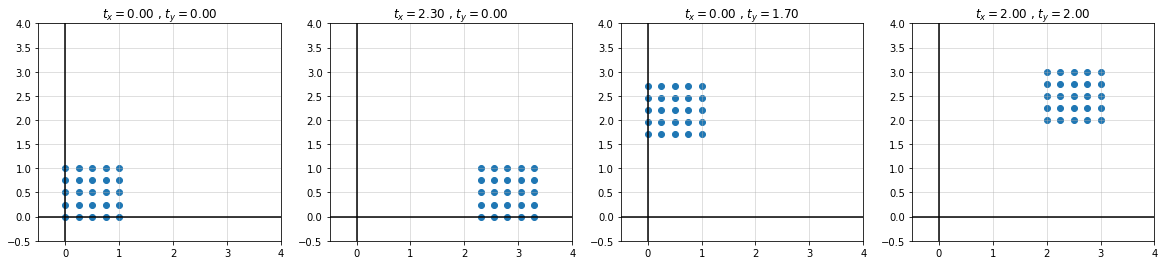

In [3]:
def trans_translate(x, y, tx, ty):
    T = [[1, 0, tx],
         [0, 1, ty],
         [0, 0, 1 ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

T_ = [[0, 0], [2.3, 0], [0, 1.7], [2, 2]]

for i in range(4):
    tx, ty = T_[i]
    x_, y_, _ = trans_translate(x, y, tx, ty)
    ax[i].scatter(x_, y_)
    ax[i].set_title(r'$t_x={0:.2f}$ , $t_y={1:.2f}$'.format(tx, ty))
    
    ax[i].set_xlim([-0.5, 4])
    ax[i].set_ylim([-0.5, 4])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

# Scaling
---
Relative to the point $(p_x, p_y)$
$$
\large x'=s_x(x - p_x) + p_x = s_x x + p_x(1 - s_x)\\
\large y'=s_y(y - p_y) + p_y = s_y y + p_y(1 - s_y)
$$
using homogeneous matrix
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} s_x & 0 & p_x(1 - s_x) \\ 0 & s_y & p_y(1 - s_y)  \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

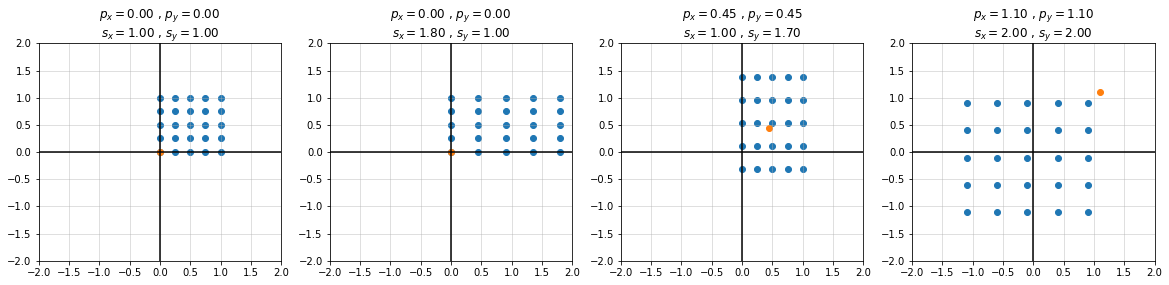

In [4]:
def trans_scale(x, y, px, py, sx, sy):
    T = [[sx, 0 , px*(1 - sx)],
         [0 , sy, py*(1 - sy)],
         [0 , 0 , 1          ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

S_ = [[1, 1], [1.8, 1], [1, 1.7], [2, 2]]
P_ = [[0, 0], [0, 0], [0.45, 0.45], [1.1, 1.1]]

for i in range(4):
    sx, sy = S_[i]; px, py = P_[i]
    x_, y_, _ = trans_scale(x, y, px, py, sx, sy)
    ax[i].scatter(x_, y_)
    ax[i].scatter(px, py)
    ax[i].set_title(r'$p_x={0:.2f}$ , $p_y={1:.2f}$'.format(px, py) + '\n'
                    r'$s_x={0:.2f}$ , $s_y={1:.2f}$'.format(sx, sy))
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

# Rotation
---
Relative to the point $(p_x, p_y)$
$$
\large x'=(x - p_x)\cos\beta-(y - p_y)\sin \beta + p_x = x \cos \beta - y \sin \beta + p_x(1 - \cos \beta) + p_y \sin \beta \\
\large y'=(x - p_x)\sin\beta+(y - p_y)\cos \beta + p_y = x \sin \beta + y \cos \beta + p_y(1 - \cos \beta) - p_x \sin \beta
$$
using homogeneous matrix
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} \cos\beta & -\sin\beta & p_x(1 - \cos \beta) + p_y \sin \beta \\ \sin\beta & \cos\beta & p_y(1 - \cos \beta) - p_x \sin \beta \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

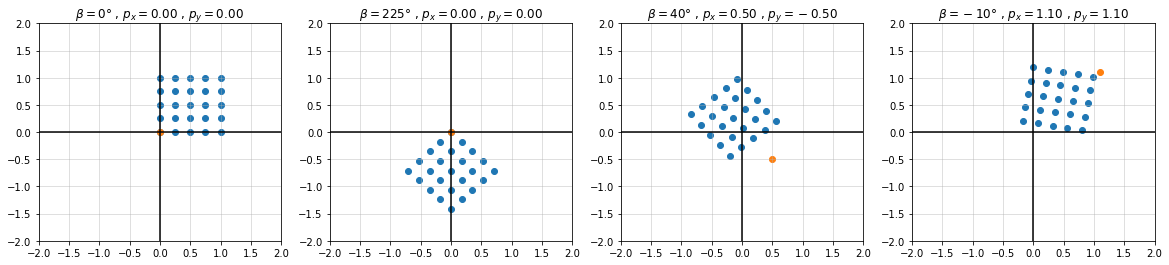

In [5]:
def trans_rotate(x, y, px, py, beta):
    beta = np.deg2rad(beta)
    T = [[np.cos(beta), -np.sin(beta), px*(1 - np.cos(beta)) + py*np.sin(beta)],
         [np.sin(beta),  np.cos(beta), py*(1 - np.cos(beta)) - px*np.sin(beta)],
         [0           ,  0           , 1                                      ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

R_ = [0, 225, 40, -10]
P_ = [[0, 0], [0, 0], [0.5, -0.5], [1.1, 1.1]]

for i in range(4):
    beta = R_[i]; px, py = P_[i]
    x_, y_, _ = trans_rotate(x, y, px, py, beta)
    ax[i].scatter(x_, y_)
    ax[i].scatter(px, py)
    ax[i].set_title(r'$\beta={0}°$ , $p_x={1:.2f}$ , $p_y={2:.2f}$'.format(beta, px, py))
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

# Shearing
---
Relative to the point $(p_x, p_y)$
$$
\large x' = x + \lambda_x(y - p_x) = x + \lambda_x y - \lambda_x p_x\\
\large y' = y + \lambda_y(x - p_y) = y + \lambda_y x - \lambda_y p_y
$$
using homogeneous matrix
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} 1 & \lambda_x & -\lambda_x p_x \\ \lambda_y & 1 & -\lambda_y p_y  \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

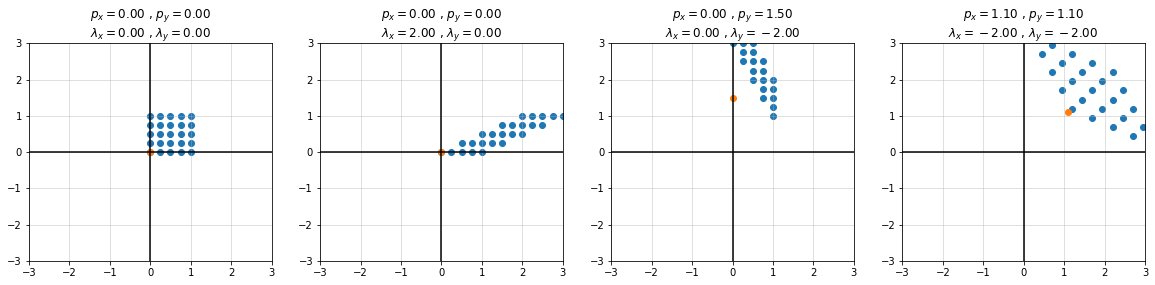

In [6]:
def trans_shear(x, y, px, py, lambdax, lambday):
    T = [[1      , lambdax, -lambdax*px],
         [lambday, 1      , -lambday*py],
         [0      , 0      ,  1         ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 4)

L_ = [[0, 0], [2, 0], [0, -2], [-2, -2]]
P_ = [[0, 0], [0, 0], [0, 1.5], [1.1, 1.1]]

for i in range(4):
    lambdax, lambday = L_[i]; px, py = P_[i]
    x_, y_, _ = trans_shear(x, y, px, py, lambdax, lambday)
    ax[i].scatter(x_, y_)
    ax[i].scatter(px, py)
    ax[i].set_title(r'$p_x={0:.2f}$ , $p_y={1:.2f}$'.format(px, py) + '\n'
                    r'$\lambda_x={0:.2f}$ , $\lambda_y={1:.2f}$'.format(lambdax, lambday))

    ax[i].set_xlim([-3, 3])
    ax[i].set_ylim([-3, 3])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()

# Reflection
---
$$
\large x'=ax + by \\
\large y'=cy + dy
$$
using homogeneous matrix
$$ \large
\begin{bmatrix} x' \\ y' \\ 1 \end{bmatrix} = \begin{bmatrix} a & b & 0 \\ c & d & 0  \\ 0 & 0 & 1 \end{bmatrix}\begin{bmatrix} x \\ y \\ 1 \end{bmatrix}
$$

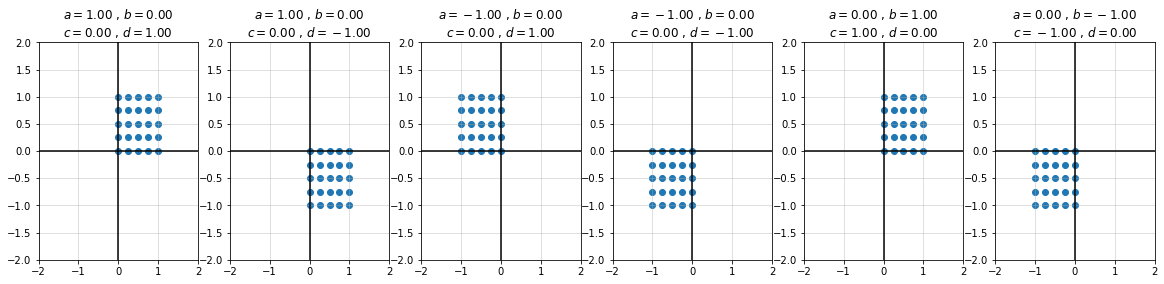

In [7]:
def trans_reflect(x, y, a, b, c, d):
    T = [[a, b , 0],
         [c , d, 0],
         [0 , 0 , 1          ]]
    T = np.array(T)
    P = np.array([x, y, [1]*x.size])
    return np.dot(T, P)

fig, ax = plt.subplots(1, 6)

COEFF_ = [[1, 0, 0,  1], [1, 0, 0, -1], [-1, 0, 0, 1], [-1, 0, 0, -1], [0, 1, 1, 0], [0, -1, -1, 0]]

for i in range(6):
    a, b, c, d = COEFF_[i]
    x_, y_, _ = trans_reflect(x, y, a, b, c, d)
    ax[i].scatter(x_, y_)
    ax[i].set_title(r'$a={0:.2f}$ , $b={1:.2f}$'.format(a, b) + '\n'
                    r'$c={0:.2f}$ , $d={1:.2f}$'.format(c, d))
    
    ax[i].set_xlim([-2, 2])
    ax[i].set_ylim([-2, 2])
    ax[i].grid(alpha=0.5)
    ax[i].axhline(y=0, color='k')
    ax[i].axvline(x=0, color='k')

plt.show()